Saving train.csv to train.csv
Shape: (1460, 81)
Columns with missing values:
 LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


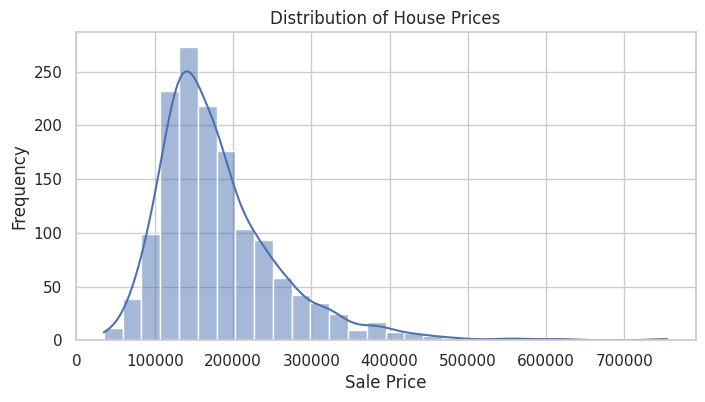

<ipython-input-3-9766387dd4c3>:58: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


Root Mean Squared Error (RMSE): 29774.58
R² Score: 0.88


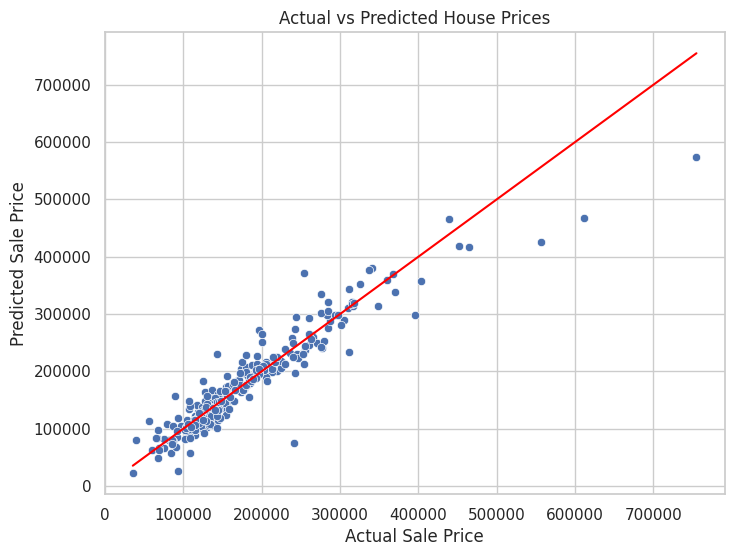

In [ ]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# For better plots
sns.set(style="whitegrid")
%matplotlib inline



from google.colab import files
uploaded = files.upload()

# You should upload 'train.csv' from Kaggle
# Load the dataset
import io
df = pd.read_csv(io.BytesIO(uploaded['train.csv']))


print("Shape:", df.shape)
print("Columns with missing values:\n", df.isnull().sum()[df.isnull().sum() > 0])
df.describe()

# Plot distribution of SalePrice
plt.figure(figsize=(8, 4))
sns.histplot(df['SalePrice'], kde=True, bins=30)
plt.title("Distribution of House Prices")
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.show()


# Drop columns with too many missing values
df = df.drop(columns=['Alley', 'PoolQC', 'Fence', 'MiscFeature'], errors='ignore')

# Fill missing numeric with median
df.fillna(df.median(numeric_only=True), inplace=True)

# Fill missing categoricals with mode
for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Convert categorical variables to one-hot encoding
df_encoded = pd.get_dummies(df)

# Separate features and target
X = df_encoded.drop("SalePrice", axis=1)
y = df_encoded["SalePrice"]



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")



plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted House Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.show()

